# Brenna Manning
# Data Science Warm Up Project
-------------------------------------------------
# Warmup Project - Data Exploration

Exploring some basic properties of the Titanic dataset.

In [131]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
# for plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import thinkplot

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Note: Looked at Kaggle script for initial idea of what should be imported

In [132]:
#Note: Used linked Kaggle Script to check how to properly read data from csv. Copied those corresp. lines below.

# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv", dtype={"Age": np.float64}, )
test_df    = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

# preview titanic data
titanic_df.head()

#preview test data
#test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [133]:
titanic_df = titanic_df.dropna(subset = ['Sex', 'Age', 'SibSp', 'Fare', 'Survived', 'Pclass'])
titanic_df = titanic_df.dropna()

test_df = test_df.dropna()

## Age of Passengers - Histogram

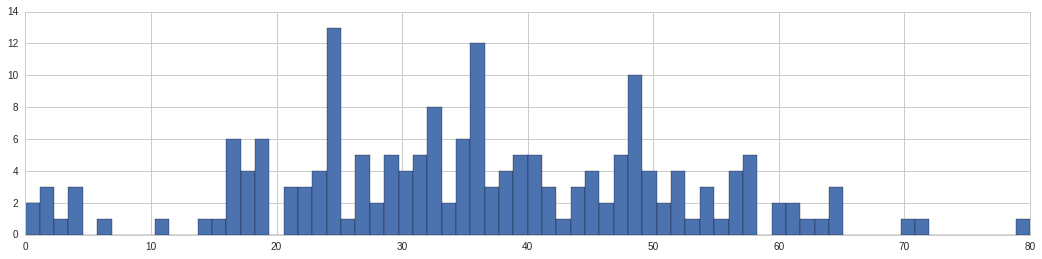

In [134]:
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

# plot original Age values
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
titanic_df['Age'].hist(bins=70, ax=axis1)

## Survival Based on Gender

In [135]:
#if titanic_df['Sex']== 'female':
#    titanic_df['Sex'] = 0
#if titanic_df['Sex']=='male':
#    titanic_df['Sex'] = 1

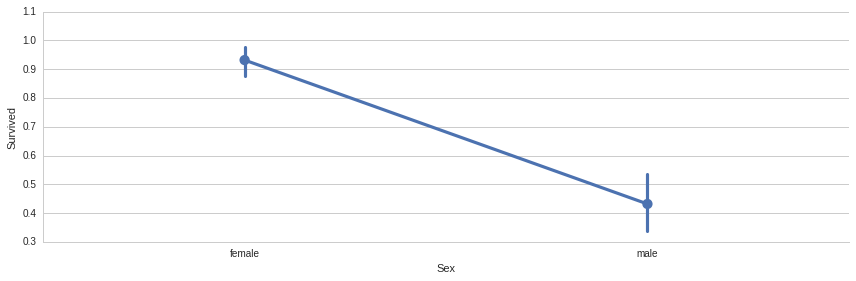

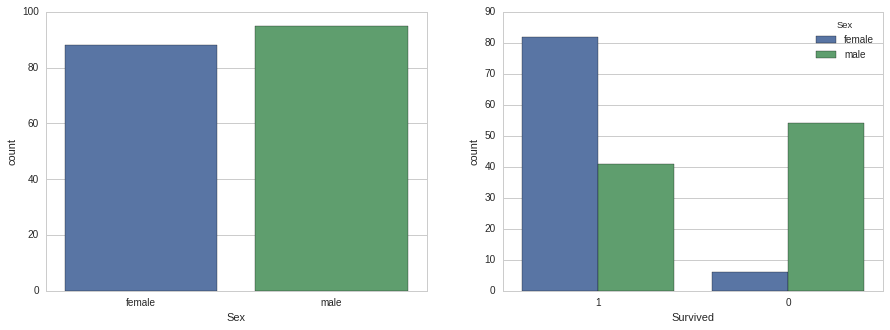

In [136]:
# plot
sns.factorplot('Sex','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='Sex', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Sex", data=titanic_df, order=[1,0], ax=axis2)




## Age/Survival Scatterplot

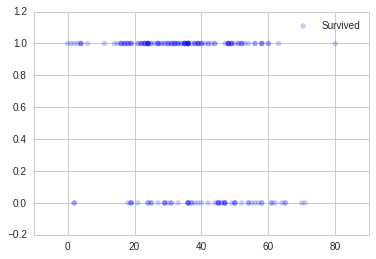

Scatterplots are not effective in observing survival because it is a boolean


In [137]:

age = titanic_df['Age']
survived = titanic_df['Survived']

thinkplot.Scatter(age, survived)
thinkplot.Show()
print 'Scatterplots are not effective in observing survival because it is a boolean'

148    36
292    36
772    57
Name: Age, dtype: int64


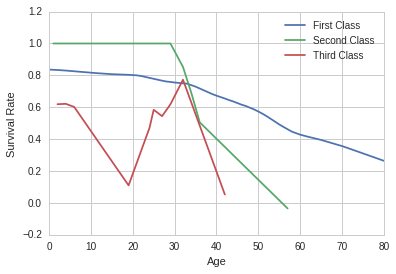

In [138]:
from statsmodels.nonparametric.smoothers_lowess import lowess

titanic_df['PclassStr'] = titanic_df['Pclass'].astype(str)

firstclass = titanic_df[titanic_df.PclassStr == '1']
secondclass = titanic_df[titanic_df.PclassStr == '2']
thirdclass = titanic_df[titanic_df.PclassStr == '3']


l1 = lowess(firstclass.Survived, firstclass.Age, it=0, missing = "drop")
plt.plot(l1[:, 0], l1[:, 1]) 
plt.xlabel('Age')
plt.ylabel('Survival Rate')

l2 = lowess(secondclass.Survived, secondclass.Age, it=0, missing = "drop")
plt.plot(l2[:, 0], l2[:, 1]) 


l3 = lowess(thirdclass.Survived, thirdclass.Age, it=0, missing = "drop")
plt.plot(l3[:, 0], l3[:, 1]) 

plt.legend(['First Class', 'Second Class', 'Third Class'])


#print 'l1'
#print l1
#print 'l2' 
#print l2
#print 'l3'
#print l3

print secondclass[titanic_df["Survived"] == 0].Age

#Note: David showed me during class how he did lowess smoothing. 
#I liked the plots that it could make and wanted to try something similar on other features.

Is the above graph relevant? Checking how many people of each age group we have data for in each class

First Class Total
first class data points:
158


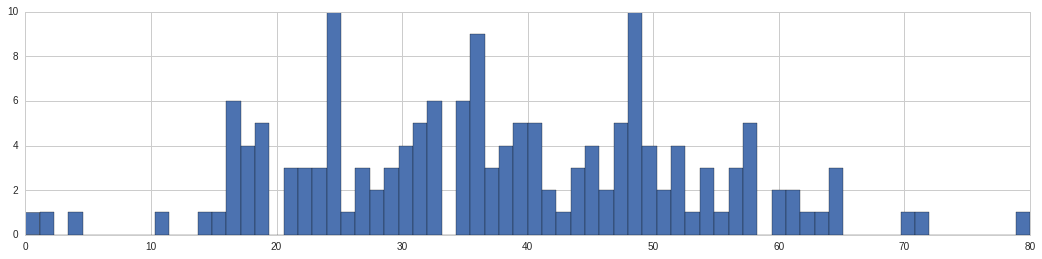

In [139]:
titanic_df['PclassStr'] = titanic_df['Pclass'].astype(str)

firstclass = titanic_df[titanic_df.PclassStr == '1']
secondclass = titanic_df[titanic_df.PclassStr == '2']
thirdclass = titanic_df[titanic_df.PclassStr == '3']


firstclass.Age = firstclass.Age.astype(int)
secondclass.Age = secondclass.Age.astype(int)
thirdclass.Age = thirdclass.Age.astype(int)

print "First Class Total"
# plot original Age values
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
firstclass.Age.hist(bins=70, ax=axis1)

print "first class data points:"
print len(firstclass)


Second Class Total
second class data points:
15


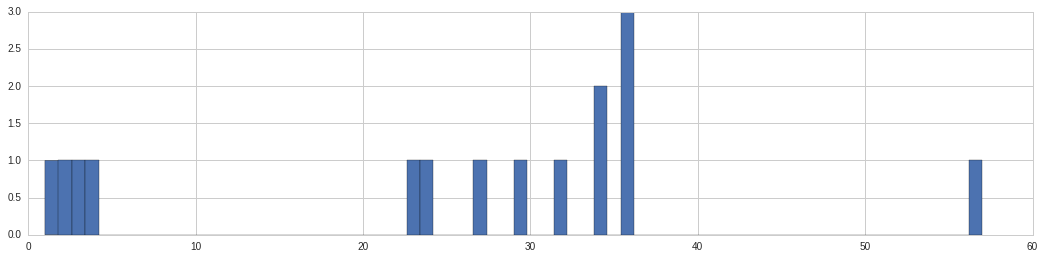

In [140]:
print "Second Class Total"
# plot original Age values
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
secondclass['Age'].hist(bins=70, ax=axis1)

print "second class data points:"
print len(secondclass)

Third Class Total
third class data points:
10


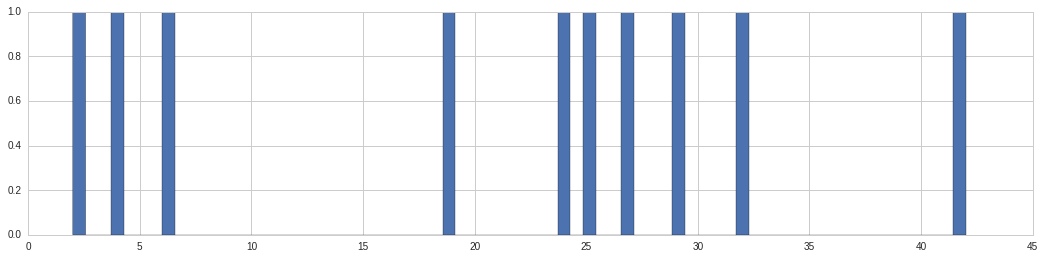

In [141]:
print "Third Class Total"
# plot original Age values
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
thirdclass['Age'].hist(bins=70, ax=axis1)

print "third class data points:"
print len(thirdclass)

#### Conclusion

Unfortunately, there is not information from enough second and third class passengers for the trends seen in the line plot above to be meaningful.

Class is certainly a factor in survival, but the intersection of class and age does not tell us enough.

## More on Fare and survival

Exploring whether ticket fare had a correlation to a passenger's wealth beyond class and if that effected survival rates.

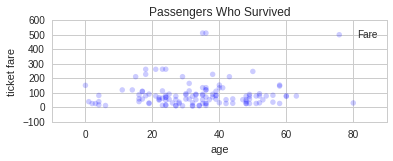

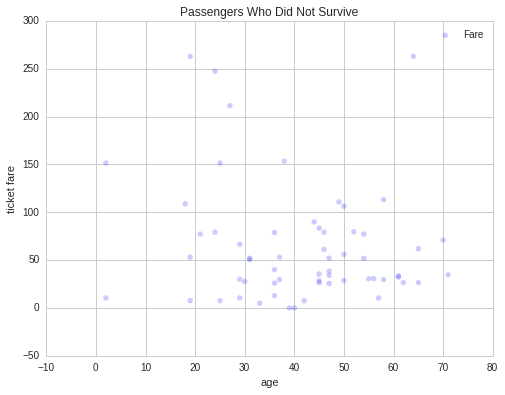

In [142]:
age_not_survived = titanic_df['Age'] [titanic_df["Survived"] == 0]
age_survived = titanic_df['Age'] [titanic_df["Survived"] == 1]

fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]
 
thinkplot.SubPlot(2, rows=2, cols=1)


thinkplot.Scatter(age_survived, fare_survived)
thinkplot.Show(title='Passengers Who Survived', xlabel='age', ylabel='ticket fare')
thinkplot.Scatter(age_not_survived, fare_not_survived)
thinkplot.Show(title='Passengers Who Did Not Survive', xlabel='age', ylabel='ticket fare')

### Survival count by fare brackets 

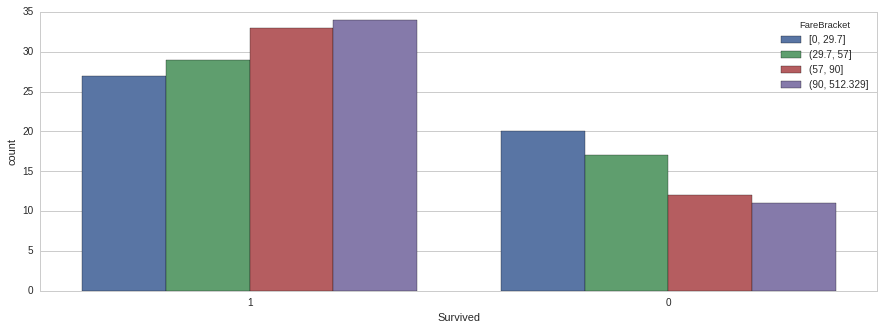

In [143]:


titanic_df.dropna()

titanic_df.Fare = titanic_df.Fare.astype(float)

titanic_df['FareBracket'] = pd.qcut(titanic_df.Fare, 4)

#print titanic_df['FareBracket']

fig, (axis1) = plt.subplots(figsize=(15,5))
    
sns.countplot(x='Survived', hue="FareBracket", data=titanic_df, order=[1,0], ax=axis1,)



There is a clear trend that the more the passenger paid for their ticket, the more likely they were to survive.

### How does this compare to Survival by Class?

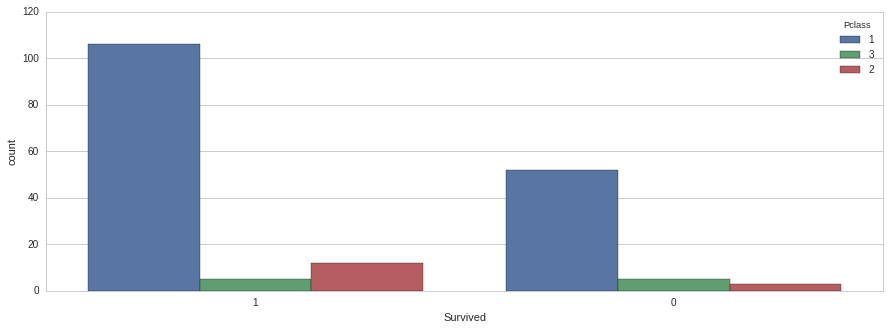

In [144]:


titanic_df.dropna()


fig, (axis1) = plt.subplots(figsize=(15,5))
    
sns.countplot(x='Survived', hue="Pclass", data=titanic_df, order=[1,0], ax=axis1,)



### Survival by location Embarked from?

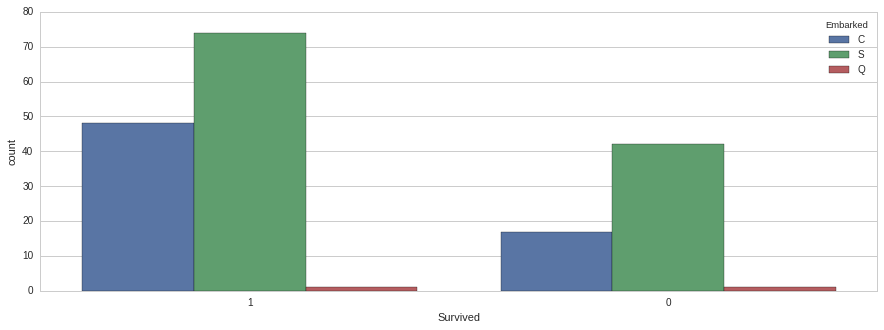

In [145]:


titanic_df.dropna()


fig, (axis1) = plt.subplots(figsize=(15,5))
    
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis1,)



Where the passenger embarked from seems to have little to no correlation with their survival. 

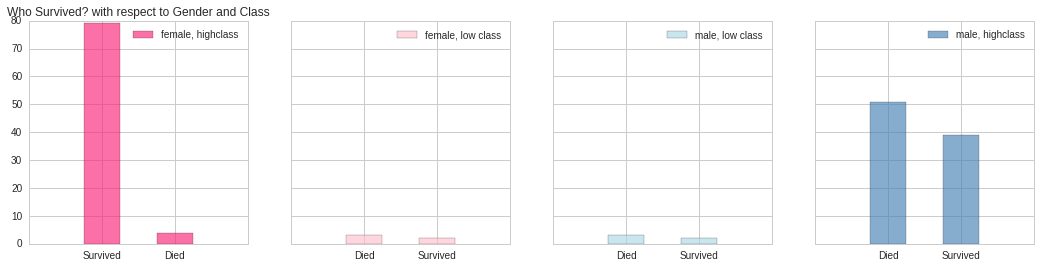

In [154]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65
#NOTE: This section has been largely copied from a tutorial
ax1=fig.add_subplot(141)
female_highclass = titanic_df.Survived[titanic_df.Sex == 'female'][titanic_df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = titanic_df.Survived[titanic_df.Sex == 'female'][titanic_df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = titanic_df.Survived[titanic_df.Sex == 'male'][titanic_df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = titanic_df.Survived[titanic_df.Sex == 'male'][titanic_df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')


